In [16]:
import pandas as pd

# File path
file_path = 'C:/Users/LENOVO/Downloads/twitter_training.csv'

# Read the CSV file, skipping the first column
data_training = pd.read_csv(file_path, header=None)

# Add meaningful column names
data_training.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# Display the first 10 rows
data_training.head(10)

,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [17]:
# File path
file_path = 'C:/Users/LENOVO/Downloads/twitter_validation.csv'

# Read the CSV file, skipping the first column
data_validation = pd.read_csv(file_path, header=None)

# Add meaningful column names
data_validation.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# Display the first 10 rows
data_validation.head(10)

,ID,Entity,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
6,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
7,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
8,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
9,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...


In [18]:
# Concatenate the two datasets
data_combined = pd.concat([data_training, data_validation])

# Reset index for the combined dataset
data_combined.reset_index(drop=True, inplace=True)

# Display the combined dataset's first few rows
print("\nCombined Data Sample:")
data_combined.head()


Combined Data Sample:


,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [19]:
data_combined.shape

(75682, 4)

In [20]:
# Check for duplicates
duplicates = data_combined.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicate rows
data_combined = data_combined.drop_duplicates()

# Check for missing values
missing_values = data_combined.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")


Number of duplicate rows: 3217
Missing values in each column:
ID             0
Entity         0
Sentiment      0
Text         326
dtype: int64


In [21]:
# Check for duplicates
duplicates = data_combined.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [22]:
# Remove rows with missing 'Text' values
data_cleaned = data_combined.dropna(subset=['Text'])

# Verify that missing values are handled
print(f"Number of rows after removing missing values: {data_cleaned.shape[0]}")

Number of rows after removing missing values: 72139


In [23]:
# Final check for duplicates
final_duplicates = data_cleaned.duplicated().sum()
print(f"Final number of duplicate rows: {final_duplicates}")

# Final check for missing values
final_missing_values = data_cleaned.isnull().sum()
print(f"Final missing values in each column:\n{final_missing_values}")


Final number of duplicate rows: 0
Final missing values in each column:
ID           0
Entity       0
Sentiment    0
Text         0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23232\1224824650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data_cleaned, palette='viridis')


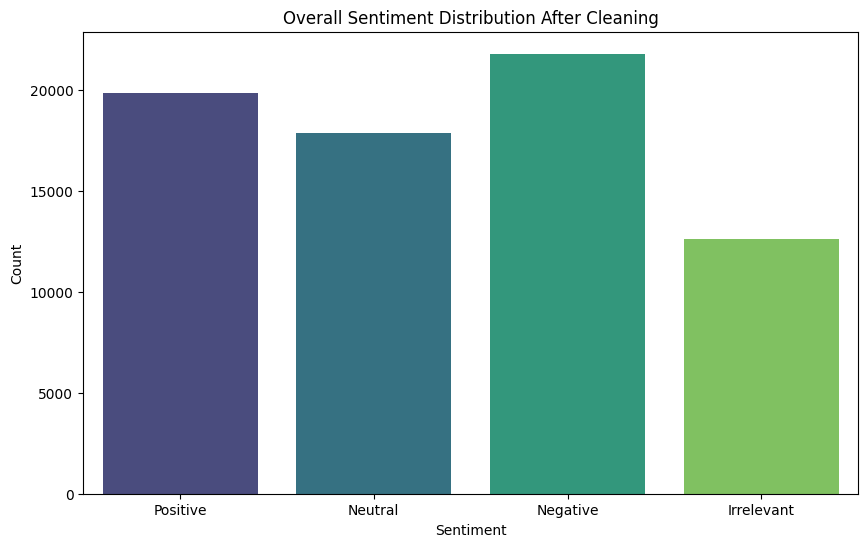

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23232\1224824650.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data_cleaned[data_cleaned['Entity'] == 'Amazon'], palette='magma')


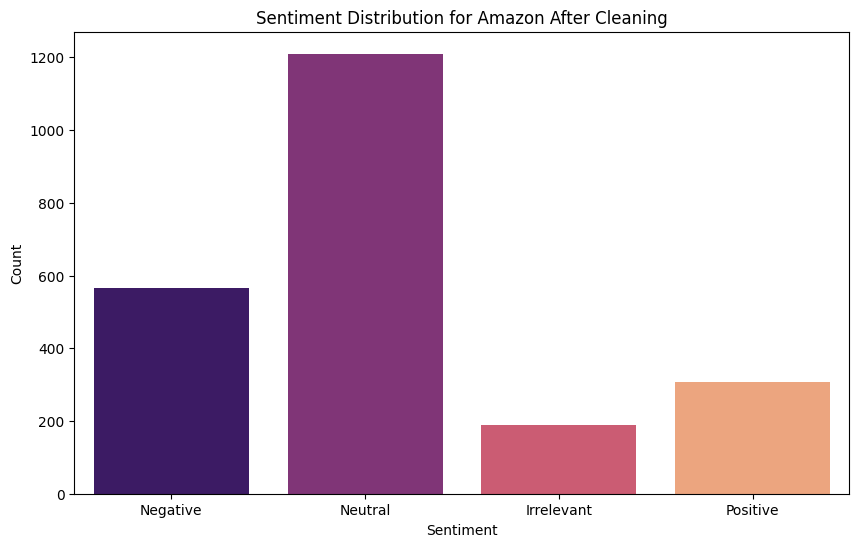

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot overall sentiment distribution after cleaning
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=data_cleaned, palette='viridis')
plt.title('Overall Sentiment Distribution After Cleaning')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot sentiment distribution for a specific entity, e.g., 'Amazon'
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=data_cleaned[data_cleaned['Entity'] == 'Amazon'], palette='magma')
plt.title('Sentiment Distribution for Amazon After Cleaning')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
